## Graphing TUFLOW

Convert __*modelname_event_scenario_PO.csv*__ files into graphs for reports

###### Python Imports
* Import NumPy, Pandas and Matplotlib

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# %matplotlib notebook
matplotlib.rcParams['figure.figsize'] = [8,5]

###### Load Files
* Change to file names uploaded through file manager

In [2]:
df_dataset_s00 = pd.read_csv('tuflow_020y/UpperSthCk_CR_020y2hr_001_PO.csv', skiprows = 1)
df_dataset_s01 = pd.read_csv('tuflow_020y/UpperSthCk_CR_020y2hr_004_PO.csv', skiprows = 1)

###### Create Time Series'
Note: May need to convert units if comparing different models

In [3]:
dataset_s00_timeseries = df_dataset_s00['Time'].tolist()
dataset_s01_timeseries = df_dataset_s01['Time'].tolist()

###### Create Data Series'
* Select 'sample_point' from the column titles
* Convert column into a list for Matplotlib

In [4]:
# Hydrographs
sample_point = 'Bonds_DS_Rickard'
#sample_point = 'C 1-5'
#sample_point = 'C 1-3'
#sample_point = 'CR_B10_Output'

values_s00 = df_dataset_s00[sample_point].tolist()
values_s01 = df_dataset_s01[sample_point].tolist()

###### Setup Graphs using Matplotlib
* Matplotlib basic setup
* Set Plot Title
* Set Series Titles
* Set Max/Min for Time Series'
* Font Styling
* Create Plot
* Display Plot

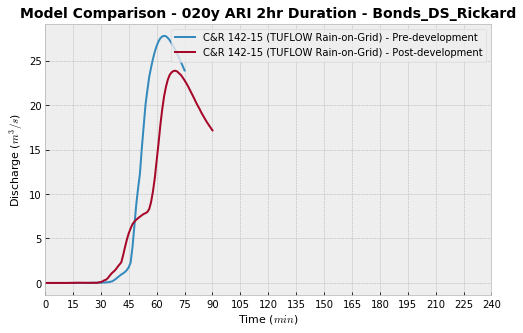

In [5]:
plot_title = 'Model Comparison - 020y ARI 2hr Duration - {}'.format(sample_point)
plot_label_s00 = 'C&R 142-15 (TUFLOW Rain-on-Grid) - Pre-development'
plot_label_s01 = 'C&R 142-15 (TUFLOW Rain-on-Grid) - Post-development'
min_time = 0
max_time = 240  # in minutes

# Graph Styling
fontlarge = {'family': 'sans-serif',
              'color': 'black',
              'weight': 'bold',
              'size': 14,
              }
fontsmall = {'family': 'sans-serif',
              'color':  'black',
              'weight': 'normal',
              'size': 11,
              }
plt.style.use('bmh')

plt.title(plot_title, fontdict = fontlarge)

plt.xlabel('Time ($min$)', fontdict = fontsmall)
plt.xlim(min_time, max_time)
plt.xticks(np.arange(min_time, max_time + 1, 15))

plt.ylabel('Discharge ($m^3/s$)', fontdict = fontsmall)

plt.plot(dataset_s00_timeseries, values_s00, label = plot_label_s00)
plt.plot(dataset_s01_timeseries, values_s01, label = plot_label_s01)

plt.legend(loc = 1)

filename = 'tuflow_020y/plot_{}.png'.format(sample_point)
plt.savefig(filename, dpi = 100)
plt.show()

###### Display Peak Flow Rates for Location

In [6]:
print('Peak Discharge (cu.m/s)')
print('Pre-Dev: ', np.max(df_dataset_s00[sample_point]))
print('Post-Dev: ', np.max(df_dataset_s01[sample_point]))

Peak Discharge (cu.m/s)
Pre-Dev:  27.786
Post-Dev:  23.8653


###### Volume of Runoff at Location
* Based on Trapezoidal Rule within NumPy

In [7]:
print('Volume of Runoff (cu.m)')
print('Pre-Dev: ', np.trapz(df_dataset_s00[sample_point], dx = 60))
print('Post-Dev: ', np.trapz(df_dataset_s01[sample_point], dx = 60))

Volume of Runoff (cu.m)
Pre-Dev:  38288.421
Post-Dev:  46394.304


###### Volume difference between Pre- and Post-Development Runoff

In [8]:
print('Approximate Basin Volume (cu.m)')
print('Volume: ', np.trapz(df_dataset_s01[sample_point], dx = 60) - np.trapz(df_dataset_s00[sample_point], dx = 60))

Approximate Basin Volume (cu.m)
Volume:  8105.883
